In [3]:
import requests

url = "http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z"
response = requests.get(url)
with open("att_faces.tar.Z", "wb") as f:
    f.write(response.content)

print("Downloaded AT&T face dataset.")


Downloaded AT&T face dataset.


In [4]:
import os
import tarfile
import subprocess

# path to your file
file_path = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces.tar.Z"
output_dir = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces"

# Step 1: Decompress .Z -> .tar using 'uncompress' (works if you have 7zip installed)
unzipped_path = file_path[:-2]  # remove .Z
if not os.path.exists(unzipped_path):
    subprocess.run(['7z', 'x', file_path, f'-o{os.path.dirname(file_path)}'])

# Step 2: Extract .tar -> folder
if os.path.exists(unzipped_path):
    with tarfile.open(unzipped_path, 'r') as tar:
        tar.extractall(output_dir)
        print(f"Extracted to: {output_dir}")


Extracted to: D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces


In [5]:
pip install unlzw3


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import unlzw3
import tarfile

# Your file
file_path = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces.tar.Z"
tar_path = file_path[:-2]  # remove .Z
output_dir = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces"

# Step 1: Decompress .Z -> .tar
with open(file_path, 'rb') as f_in, open(tar_path, 'wb') as f_out:
    f_out.write(unlzw3.unlzw(f_in.read()))

# Step 2: Extract .tar
with tarfile.open(tar_path, 'r') as tar:
    tar.extractall(output_dir)
    print(f"Extracted to: {output_dir}")


Extracted to: D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces


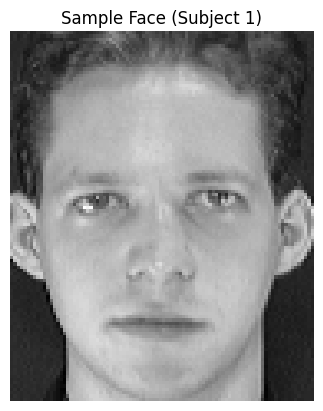

In [7]:
import cv2
import matplotlib.pyplot as plt
import os


img_path = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces\orl_faces\s1\1.pgm"

#img_path = os.path.join(data_path, "s1", "1.pgm")

# Read image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Display
plt.imshow(img, cmap="gray")
plt.title("Sample Face (Subject 1)")
plt.axis("off")
plt.show()


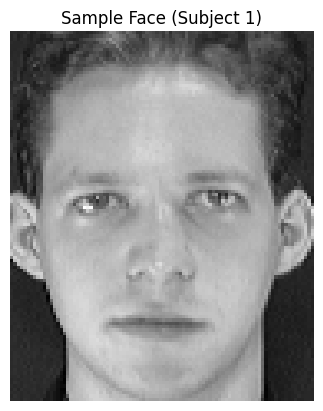

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(img_path)   # directly read PGM
plt.imshow(img, cmap="gray")
plt.title("Sample Face (Subject 1)")
plt.axis("off")
plt.show()


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
#.convert("L") it will convert into grey scale 0-255


In [10]:
import numpy as np
def load_images_from_folder(folder):
    images = []
    labels = []
    for person in os.listdir(folder):
        person_path = os.path.join(folder, person)
        if os.path.isdir(person_path):
            for file in os.listdir(person_path):
                if file.endswith(".pgm"):
                    img_path = os.path.join(person_path, file)
                    img = Image.open(img_path).convert("L")  # grayscale
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(person)  # label is folder name
    return np.array(images), np.array(labels)

In [11]:
data_path = r"D:\PycharmProjects\pythonProject\U23AI113\DS_LAB\DS_Lab3\att_faces\orl_faces"  
X, y = load_images_from_folder(data_path)

In [12]:
X.shape

(400, 112, 92)

In [13]:
n= X[0]
n.shape

(112, 92)

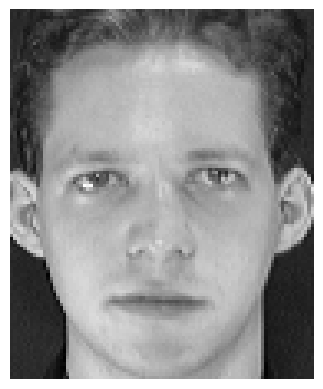

In [14]:
import matplotlib.pyplot as plt

plt.imshow(n, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  
plt.show()

In [15]:
y.shape

(400,)

In [16]:
X_flat = X.reshape(X.shape[0], -1)

In [17]:
X_flat.shape

(400, 10304)

In [18]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_flat)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
X_train.shape

(320, 10304)

In [21]:
y_train.shape

(320,)

In [22]:
n = X_train.shape[0]
n

320

In [23]:
mu = X_train.mean(axis=0, keepdims=True)
Xc_train = X_train - mu
mu

array([[-0.00232301, -0.00068307, -0.00061511, ..., -0.03693985,
        -0.02362082, -0.02508105]], shape=(1, 10304))

In [24]:
C = (Xc_train @ Xc_train.T) / (n - 1)

In [25]:
eigvals, eigvecs = np.linalg.eigh(C)

In [26]:
eigvals.shape

(320,)

In [27]:
eigvecs.shape

(320, 320)

In [28]:
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

In [29]:
idx

array([319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307,
       306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294,
       293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282, 281,
       280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 269, 268,
       267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255,
       254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243, 242,
       241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229,
       228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216,
       215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
       202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190,
       189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177,
       176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164,
       163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151,
       150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 13

In [30]:
U = (Xc_train.T @ eigvecs) 

In [31]:
U.shape

(10304, 320)

In [32]:
U = U / np.linalg.norm(U, axis=0, keepdims=True)

In [33]:
k = 50
eigenfaces = U[:, :k] 

In [34]:
Xc_test = X_test - mu

In [35]:
Z_test = Xc_test @ eigenfaces

In [36]:
X_recon = Z_test @ eigenfaces.T

In [37]:
X_recon = X_recon + mu

In [38]:
X_recon.shape

(80, 10304)

In [39]:
sample =X[0]
sample=sample.reshape(112, 92)
sample.shape

(112, 92)

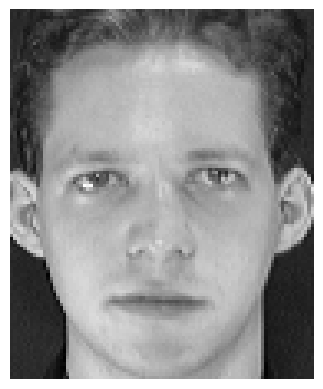

In [40]:
plt.imshow(sample, cmap='gray')  
plt.axis('off')  
plt.show()

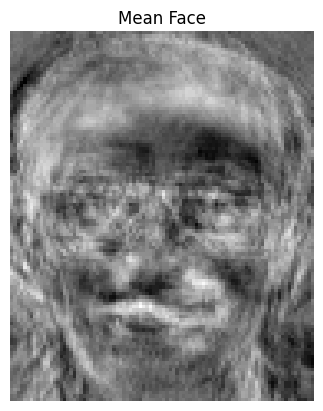

In [41]:
mean_face = np.mean(X_train, axis=0)   # mean across all training samples
plt.imshow(mean_face.reshape(112, 92), cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

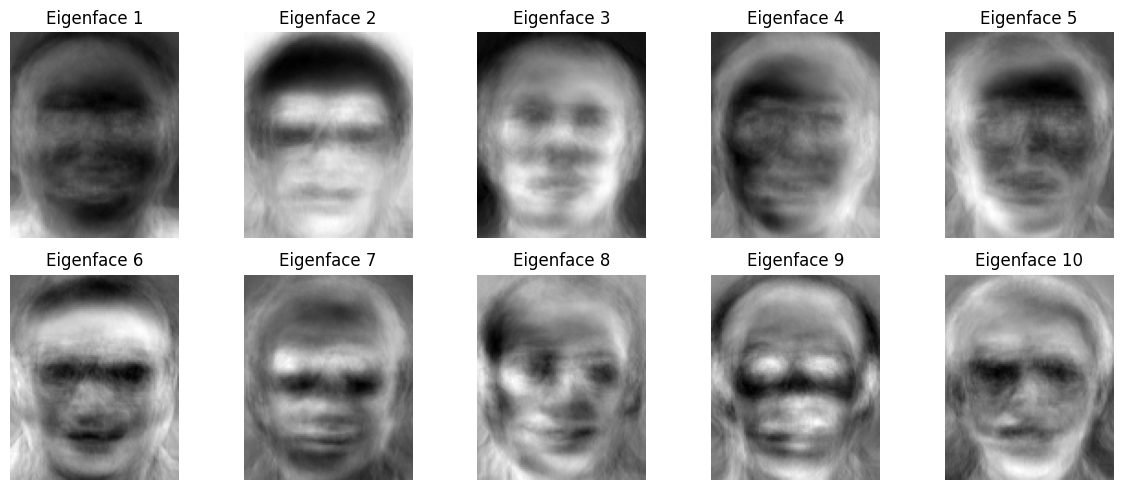

In [42]:
n_display = 10   # number of eigenfaces to show
fig, axes = plt.subplots(2, 5, figsize=(12, 5))  # grid of 2x5 for 10 eigenfaces

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[:, i].reshape(112, 92), cmap="gray")
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [43]:
def project(X, mean_face, eigenfaces, k):
    Xc = X - mean_face  # center
    Z = Xc @ eigenfaces[:, :k]  # project onto top-k eigenfaces
    return Z

def reconstruct(Z, mean_face, eigenfaces, k):
    X_recon = Z @ eigenfaces[:, :k].T + mean_face
    return X_recon


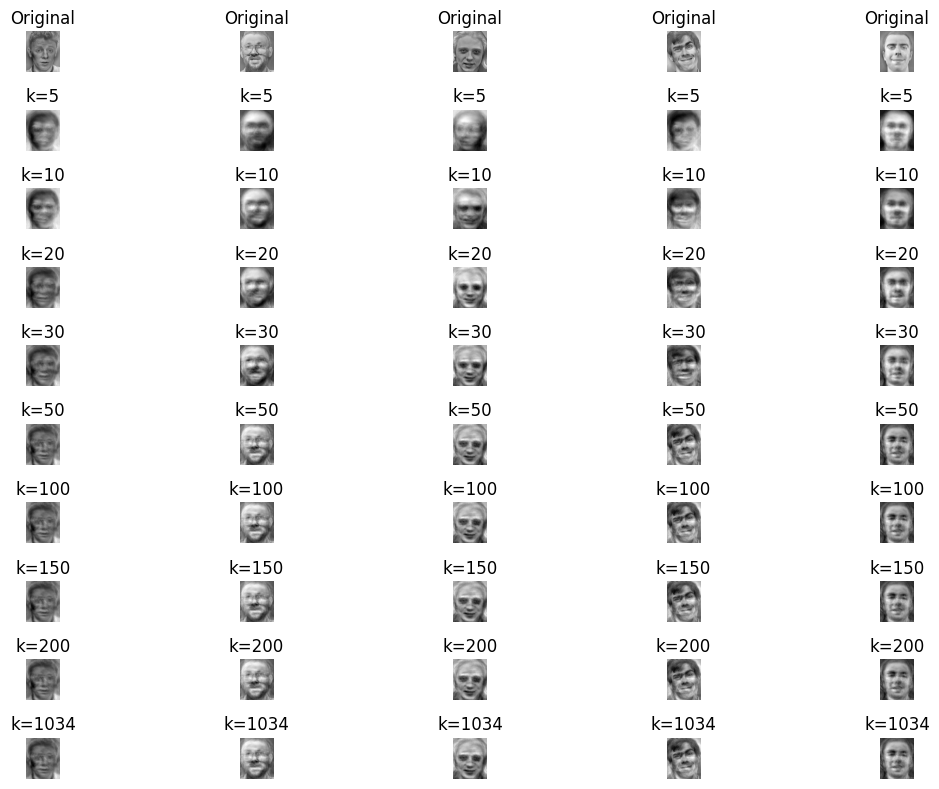

In [44]:
k_values = [5, 10, 20, 30, 50, 100,150,200,1034]

fig, axes = plt.subplots(len(k_values)+1, 5, figsize=(12, 8))

# original images (first 5)
for i in range(5):
    axes[0, i].imshow(X_train[i].reshape(112, 92), cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

# reconstructed with different k
for row, k in enumerate(k_values):
    Z = project(X_train, mu, eigenfaces, k)
    X_recon = reconstruct(Z, mu, eigenfaces, k)
    for i in range(5):
        axes[row+1, i].imshow(X_recon[i].reshape(112, 92), cmap="gray")
        axes[row+1, i].set_title(f"k={k}")
        axes[row+1, i].axis("off")

plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error

for k in k_values:
    Z = project(X_train, mu, eigenfaces, k)
    X_recon = reconstruct(Z, mu, eigenfaces, k)
    mse = mean_squared_error(X_train.flatten(), X_recon.flatten())
    print(f"k={k}, Reconstruction MSE={mse:.4f}")


k=5, Reconstruction MSE=0.5243
k=10, Reconstruction MSE=0.4071
k=20, Reconstruction MSE=0.3033
k=30, Reconstruction MSE=0.2473
k=50, Reconstruction MSE=0.1803
k=100, Reconstruction MSE=0.1803
k=150, Reconstruction MSE=0.1803
k=200, Reconstruction MSE=0.1803
k=1034, Reconstruction MSE=0.1803


In [46]:
import numpy as np

def nearest_neighbor_classifier(Z_train, y_train, Z_test):
    y_pred = []
    for z in Z_test:
        distances = np.linalg.norm(Z_train - z, axis=1)  # Euclidean distance
        nn_index = np.argmin(distances)  # nearest neighbor index
        y_pred.append(y_train[nn_index])
    return np.array(y_pred)


In [47]:
from sklearn.metrics import accuracy_score

k_values = [5, 10, 20, 50, 100, 150]  # choose based on dataset size
for k in k_values:
    # project training & test data
    Z_train = project(X_train, mean_face, eigenfaces, k)
    Z_test  = project(X_test, mean_face, eigenfaces, k)

    # classify
    y_pred = nearest_neighbor_classifier(Z_train, y_train, Z_test)

    # evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Recognition Accuracy={acc:.4f}")


k=5, Recognition Accuracy=0.8875
k=10, Recognition Accuracy=0.9625
k=20, Recognition Accuracy=0.9875
k=50, Recognition Accuracy=0.9875
k=100, Recognition Accuracy=0.9875
k=150, Recognition Accuracy=0.9875


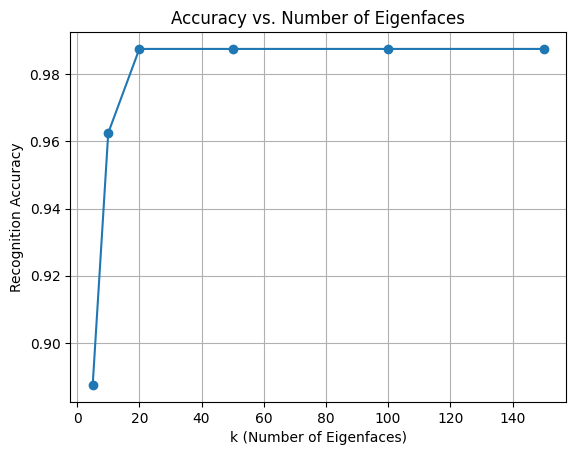

In [48]:
import matplotlib.pyplot as plt

accuracies = []
for k in k_values:
    Z_train = project(X_train, mean_face, eigenfaces, k)
    Z_test  = project(X_test, mean_face, eigenfaces, k)
    y_pred = nearest_neighbor_classifier(Z_train, y_train, Z_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (Number of Eigenfaces)")
plt.ylabel("Recognition Accuracy")
plt.title("Accuracy vs. Number of Eigenfaces")
plt.grid(True)
plt.show()


In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [52]:
Z_all = project(X_flat, mean_face, eigenfaces, 50)   # shape (400, 50)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
Z_tsne = tsne.fit_transform(Z_all)   # shape (400, 2)


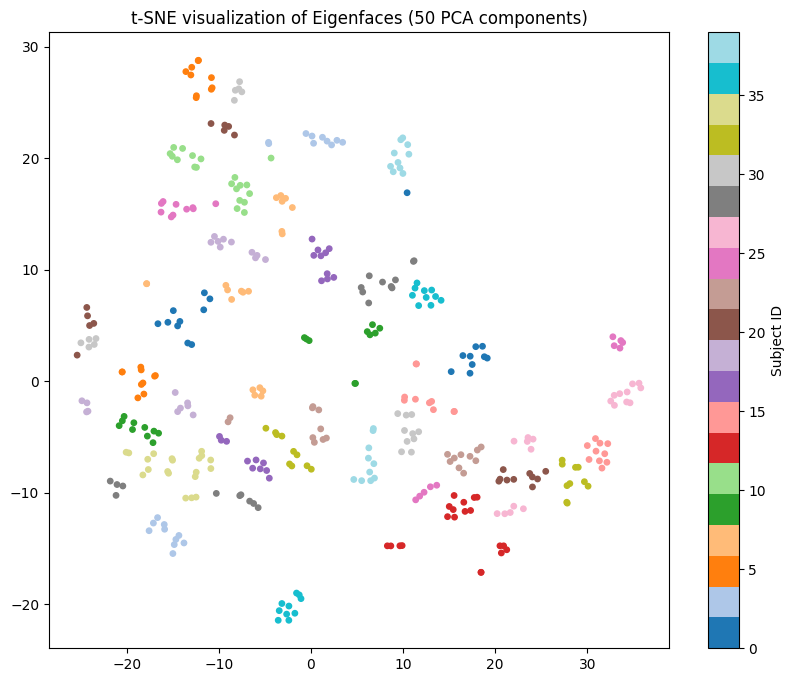

In [55]:
import numpy as np

# Convert string labels like 's1', 's2', ... into integers
unique_labels = np.unique(y)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_int = np.array([label_to_int[label] for label in y])

# Now plot with numeric labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_tsne[:,0], Z_tsne[:,1], c=y_int, cmap="tab20", s=15)
plt.colorbar(scatter, label="Subject ID")
plt.title("t-SNE visualization of Eigenfaces (50 PCA components)")
plt.show()
